# 순환 신경망
- 순환 신경망
  - 심층 신경망, 합성곱 신경망 등 지금까지 본 내용에서 다룬 신경망들은 입력값이 오직 한 방향으로만 계산되어 출력이 계산되는 구조였음.
  - 한쪽 방향으로만 데이터가 흐르는 신경망을 Feed Forward Network(FFN)이라고 함.
  - RNN(Recurrent Neural Networks): 매 입력에 대한 inference 혹은 iteration때 마다 은닉층의 값 계산 시 미리 보관하고 있던 값과 입력으로부터 계산된 값을 모두 사용하는 신경망 구조이다.
  - RNN에 대해 이해하려면, 이전에는 생각하지 않았던 데이터의 입력 순서 및 각 순서에 따른 index를 고려해야 함. 따라서 RNN은 일반적으로 시간 순서가 있는 데이터에 대해 적용하며 자연어 데이터, 음성 데이터 및 시계열 데이터가 대표적인 예시이다.
  - MLP 및 CNN에서는 데이터를 한꺼번에 신경망에 입력해줬으나, RNN은 seqeuce 데이터를 대상으로 하며 한꺼번에 입력하는 것이 아니라 매 time step마다 sequence의 요소 하나씩을 입력함.

  - 첫번째 단어가 RNN에 입력되면, 입력 -> 은닉 -> 출력층 순서대로 계산이 수행되며 결과값을 도출하게 됨.
    - 각 칸은 층을 나타내며, 뉴런이 여러 개 있을 수도 있고 중간중간 값은 벡터에 해당한다고 볼 수 있음.
  - 두번째 단어가 RNN에 입력되면, 입력 -> 은닉 -> 출력층 순서대로 계산이 수행되는 것은 동일하나, 은닉층에서 두 번째 단어에 대한 계산값만 사용하는 것이 아니라 첫번째 단어에 대한 계산을 수행할 때의 은닉층 값 또한 가중치를 곱한 후 사용하는 것을 알 수 있음.
    - 이와 같이 index 1에서의 은닉층 값은 index 2에서의 은닉층 값 계산에 영향을 주고, index 2는 index 3에 영향을 주는 등 도미노처럼 이어지게 됨.
  - 보통 RNN은 순환하는 계산 구조가 있는 은닉층에 loop edge를 추가하여 표시함.
  - 입력 뉴런(노드) 4개, 은닉층 및 출력층 뉴런은 2개가 있다고 가정하면, time step 2에서의 은닉층 뉴런들은 입력 뉴런 및 time step 1에서의 은닉층 뉴런값들을 이용하여 결과값을 도출해냄.
  - RNN의 가장 중요한 특성 중 하나는 다양한 길이의 입력 sequence를 처리할 수 있다는 것임.
    - CNN은 입력의 크기가 정해져 있는데 반해 RNN은 입력된 sequence의 길이만큼 순환 계산을 반복하면 되므로 다양한 길이에 대해 처리가 가능함.
  - 기본적으로 순환 신경망에 입력을 넣을 때마다 매번 그에 해당하는 출력값이 나오지만, 입력값을 어떻게 설정하는지 및 출력값들 중 어떤 것을 유의미하게 해석해서 사용할 것인지에 따라 RNN 활용 방식은 3가지 방식으로 나뉜다.
    - one-to-many
    - many-to-one
    - many-to-many
  
- one-to-many
  - 입력 sequence는 길이가 1이지만, 여기서 나오는 출력을 다시 다음 time step의 입력값으로 사용해서 우리가 원하는 형태의 길이를 갖는 출력을 얻는 방식임.
  - ex) 이미지에서 뽑은 특성을 입력받은 후 이를 설명하는 문장을 생성해내는 image captioning이 있다.
    - 문장 생성 시 한 time step마다 단어 혹은 토큰 하나씩 생성됨.

- many-to-one
  - 입력 sequence는 길이가 다양할 수 있고 매 time step마다 결과가 나오긴 하지만 모든 sequence를 다 입력한 다음 나오는 결과만 활용해서 우리가 원하는 예측값을 얻는 방식을 의미함.
  - ex) 텍스트 분류

- many-to-many
  - 입력 sequence에 대해 매 time step마다 나오는 결과를 종합하여 활용하는 방식을 의미함.
  - ex) 기계 번역

- 순환 신경망 상세 구조
  - RNN에서의 입력층, 은닉층, 출력층의 각 데이터 벡터를 x, y, h로 두고 이들을 계산하는데 필요한 가중치들을 아래와 같이 정의함.
  - 은닉층에서 출력층으로 가는 연산은 기존 FC와 동일하므로 은닉층의 계산을 중점적으로 살펴보고자 함.
  - 특정 time step t에서의 은닉층 벡터는 h_t로 나타내며 h_t 계산에 사용하는 time step (t-1)의 은닉층 벡터는 h_t-1로 나타냄.
  - 은닉층에서의 활성함수는 가장 일반적으로 쓰이는 tanh로 가정 (다른 홯성 함수도 적용 가능함.)
    - h_t = tanh(W * x_t + U * h_t-1 + b)
  - 입력층의 뉴런 개수 및 은닉층의 뉴런 개수를 모두 4개라고 가정하면, 은닉층 연산을 나타낼 수 있음.
  - RNN의 은닉층 연산에서는 기본적으로 이전 time step에서의 은닉층 값이 꼭 필요함.
  - 이와 같은 은닉층 값을 hidden state라고 부르고, 실제 구현 및 활용 시에는 별도 변수로 관리함.
  - sequence가 시작할 때는 미리 계산된 hidden state가 없는 상황인데, 이럴 때는 일반적으로 hidden state를 zero tensor로 초기화한 후 RNN의 예측값 계산을 시작함.

# 심층 순환 신경망
- 심층 순환 신경망
  - 심층 신경망처럼 RNN 또한 여러 층의 은닉층을 포함할 수 있음.
  - 각 은닉층은 이전 time step의 값으 참조할 때 서로 같은 층의 값만 참조함.

# 양방향 순환 신경망
- 양방향 순환 신경망
  - 순환 신경망은 기본적으로 time step 순서대로 값을 입력하여 결과값을 생성하지만, 때로는 오히려 time step의 역순으로 분석하는 것도 도움이 될 때가 있다.
  - 순방향으로도 결과를 도출하고, 역방향으로도 값들을 입력하여 결과를 도출할 후 이를 합친 것을 최종 결과로 사용하는 RNN 형식을 양방향(bi-directional) 순환 신경망이라고 함.

# 장기 의존성 문제 및 LSTM
- 장기 의존성 문제
  - 지금까지 다룬 형태의 RNN을 가장 단순한 형태의 RNN이라는 의미로 Vanilla RNN이라고 함.
  - Vanilla RNN은 이전 입력값들을 분석한 결과를 응축한 형태로 은닉층 값을 계속 변화시켜 나가지만, 그 구조상 어쩔 수 없이 입력 seqeunce의 길이가 길어지면 처음에 분석했던 정보를 나중까지 유지하기는 매우 어려움.
    - 만약 t가 매우 크다면, time step 0, 1에서 분석한 정보들은 time step이 t가 되어서는 거의 희석되어 있다고 볼 수 있음.
  - Vanilla RNN은 sequence 정보를 처리하는데 유리한 구조이지만, sequence 길이가 길어지면, 서로 거리가 먼 입력값들 사이의 관계를 예측하는데 어려움을 겪음.
    - 이와 같은 단점을 보완하기 위해서, Vanilla RNN에 장기 기억을 위한 메모리를 더해준 신경망 구조가 Long Short Term Memory(LSTM) 신경망임.

- LSTM
  - LSTM의 한 층(혹은 cell이라고도 함)은 Vanilla RNN의 은닉층 값 이외에 cell state라고 불리는 C_t가 추가로 존재함.
  - C_t는 장기적으로 관리해야 할 지식들을 따로 관리하는 벡터라고 볼 수 있음.
  - LSTM에서는 h_t 및 C_t에 대해 순환 연산 구조를 갖고 있다고 요약 가능함.
  - RNN 계열 신경망 구조는 일반적으로 어떤 종류의 RNN cell을 썼는지 명시하고, 전체적인 구조는 Vanilla RNN에서 배웠던 구조처럼 나타냄.
  - Vanilla RNN과 LSTM은 hidden state와 output 값이 따로 존재하는데, LSTM의 구조를 조금 더 단순화하여 장기 기억에 능하면서도 따로 Output은 내지 않고 hidden state만 갖도록 하여 속도 및 메모리 효율성을 개선한 GRU라는 cell 형태가 있음.
  - 3가지 종류의 RNN cell은 가장 대표적인 RNN cell 구조라고 할 수 있음.
    - RNN
    - LSTM
    - GRU
     - GRU 모델 구현
        - 일반적으로 many-to-one 구조에서는 마지막 토큰까지 다 분석한 hidden state 또는 output으로부터 전결합층을 연결하여 최종 결과값을 도출함.
        - PyTorch의 RNN cell들은 forward를 수행할 때 hidden state를 입력해주어야 함.

------------

Sentiment Analysis using RNN models

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import string
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset loading

In [27]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#zip 파일 현재 폴더로 복사, 중간 부분은 파일명에 따라 변경 필요
!cp '/content/drive/MyDrive/IMDB Dataset.csv.zip' ./

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#압축 해제
!unzip 'IMDB Dataset.csv.zip'

Archive:  IMDB Dataset.csv.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB Dataset.csv        


In [29]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
  device = torch.device("cuda")
  print("GPU is available")
else:
  device = torch.device("cpu")
  print("GPU not available, CPU used")

GPU is available


In [30]:
base_csv = 'IMDB Dataset.csv'
df = pd.read_csv(base_csv)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Pre-process the dataset

In [31]:
X, y = df['review'].values, df['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (40000,)
shape of test data is (10000,)


In [32]:
def preprocess_string(s):
  # Remove all non-word characters (everything except numbers and letters)
  s = re.sub(r"[^\w\s]", '', s)
  # Replace all runs of whitespaces with no space
  s = re.sub(r"\s+", '', s)
  # replace digits with no space
  s = re.sub(r"\d", '', s)

  return s

In [33]:
def tokenize(x_train,y_train,x_val,y_val):
  word_list = []

  stop_words = set(stopwords.words('english'))
  for sent in x_train:
    for word in sent.lower().split():
      word = preprocess_string(word)
      if word not in stop_words and word != '':
        word_list.append(word)

  corpus = Counter(word_list)
  # sorting on the basis of most common words
  corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
  # creating a dict
  onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

  # tokenize
  final_list_train,final_list_test = [],[]
  for sent in x_train:
    final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() if preprocess_string(word) in onehot_dict.keys()])
  for sent in x_val:
    final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() if preprocess_string(word) in onehot_dict.keys()])

  encoded_train = [1 if label =='positive' else 0 for label in y_train]
  encoded_test = [1 if label =='positive' else 0 for label in y_val]
  return np.array(final_list_train, dtype=object), np.array(encoded_train),np.array(final_list_test, dtype=object), np.array(encoded_test),onehot_dict

In [34]:
# tokenize 함수 실행
x_train, y_train, x_test, y_test, vocab = tokenize(x_train, y_train, x_test, y_test)
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


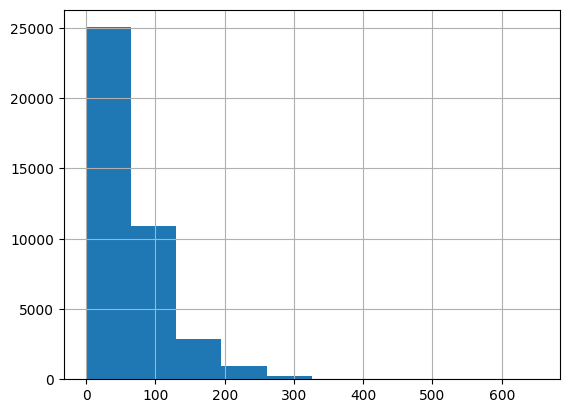

,0
count,40000.000000
mean,69.089175
std,47.854883
min,0.000000
25%,39.000000
50%,54.000000
75%,84.000000
max,651.000000


In [35]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [36]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len),dtype=int)
  for ii, review in enumerate(sentences):
    if len(review) != 0:
      features[ii, -len(review):] = np.array(review)[:seq_len]
  return features

#train과 test에 대해서 padding_ 함수 실행, seq_len = 200
x_train_pad = padding_(x_train, 200)
x_test_pad = padding_(x_test, 200)

In [37]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [38]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[  0,   0,   0,  ..., 107, 316,  97],
        [  0,   0,   0,  ...,  11,  45,  25],
        [  0,   0,   0,  ..., 826, 375, 130],
        ...,
        [  0,   0,   0,  ...,  32,   2, 482],
        [  0,   0,   0,  ..., 306, 171, 211],
        [  0,   0,   0,  ..., 447,  98, 446]])
Sample input: 
 tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1])


In [39]:
class GRU_model(nn.Module):
  def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, device):
    super(GRU_model, self).__init__()
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    self.device = device

    self.embed = nn.Embedding(n_vocab, embed_dim)
    self.gru = nn.GRU(embed_dim, self.hidden_dim, num_layers=self.n_layers, batch_first=True)
    self.out = nn.Linear(self.hidden_dim, n_classes)

  def forward(self, x):
    x = self.embed(x)
    h_0 = self._init_state(batch_size=x.size(0))
    x, _ = self.gru(x, h_0)
    h_t = x[:, -1, :]
    logit = self.out(h_t)
    return logit

  def _init_state(self, batch_size):
    new_state = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)
    return new_state

In [40]:
n_layers = 1
vocab_size = len(vocab) + 1  # extra 1 for <pad>
hidden_dim = 128
embed_dim = 100
n_classes = 2

#GRU 모델 객체 생성
model = GRU_model(n_layers, hidden_dim, vocab_size, embed_dim, n_classes, device).to(device)

Train and evaluation

In [41]:
def train(model, criterion, optimizer, data_loader):
  model.train()
  train_loss = 0
  for i, (x, y) in enumerate(data_loader):
    x, y = x.to(device), y.to(device)

    optimizer.zero_grad()
    logit = model(x)
    loss = criterion(logit, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item() * x.size(0)
  return train_loss / len(data_loader.dataset)

def evaluate(model, data_loader):
  model.eval()
  corrects, total_loss = 0, 0
  for i, (x, y) in enumerate(data_loader):
    x, y = x.to(device), y.to(device)

    logit = model(x)
    corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
  size = len(data_loader.dataset)
  avg_accuracy = 100.0 * corrects / size
  return avg_accuracy

In [42]:
num_epochs = 10
lr = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for e in range(1, num_epochs+1):
  train_loss = train(model, criterion, optimizer, train_loader)
  test_accuracy = evaluate(model, test_loader)
  print("[Epoch: %d] train loss : %5.2f | test accuracy : %5.2f" % (e, train_loss, test_accuracy))

[Epoch: 1] train loss :  0.45 | test accuracy : 84.52
[Epoch: 2] train loss :  0.33 | test accuracy : 85.36
[Epoch: 3] train loss :  0.29 | test accuracy : 86.08
[Epoch: 4] train loss :  0.25 | test accuracy : 86.44
[Epoch: 5] train loss :  0.21 | test accuracy : 86.25
[Epoch: 6] train loss :  0.16 | test accuracy : 85.05
[Epoch: 7] train loss :  0.11 | test accuracy : 85.15
[Epoch: 8] train loss :  0.08 | test accuracy : 84.80
[Epoch: 9] train loss :  0.05 | test accuracy : 84.46
[Epoch: 10] train loss :  0.05 | test accuracy : 84.78


LSTM model code

In [43]:
class LSTM_model(nn.Module):
  def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, device):
    super(LSTM_model, self).__init__()
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    self.device = device

    self.embed = nn.Embedding(n_vocab, embed_dim)
    self.lstm = nn.LSTM(embed_dim, self.hidden_dim, num_layers=self.n_layers, batch_first=True)
    self.out = nn.Linear(self.hidden_dim, n_classes)

  def forward(self, x):
    x = self.embed(x)
    h_0 = self._init_state(batch_size=x.size(0))
    x, _ = self.lstm(x, h_0)
    h_t = x[:,-1,:]
    logit = self.out(h_t)
    return logit

  def _init_state(self, batch_size):
    new_cell_state = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)
    new_hidden_state = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)
    return (new_hidden_state, new_cell_state)

LSTM training and evaluation

In [44]:
#LSTM 모델 객체 생성
model = LSTM_model(n_layers, hidden_dim, vocab_size, embed_dim, n_classes, device).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
for e in range(1, num_epochs+1):
  train_loss = train(model, criterion, optimizer, train_loader)
  test_accuracy = evaluate(model, test_loader)
  print("[Epoch: %d] train loss : %5.2f | test accuracy : %5.2f" % (e, train_loss, test_accuracy))

[Epoch: 1] train loss :  0.47 | test accuracy : 80.69
[Epoch: 2] train loss :  0.37 | test accuracy : 84.35
[Epoch: 3] train loss :  0.32 | test accuracy : 84.67
[Epoch: 4] train loss :  0.29 | test accuracy : 84.57
[Epoch: 5] train loss :  0.26 | test accuracy : 85.37
[Epoch: 6] train loss :  0.22 | test accuracy : 84.78
[Epoch: 7] train loss :  0.17 | test accuracy : 85.35
[Epoch: 8] train loss :  0.13 | test accuracy : 84.33
[Epoch: 9] train loss :  0.08 | test accuracy : 84.67
[Epoch: 10] train loss :  0.06 | test accuracy : 84.54


Vanilla RNN model code

In [45]:
class RNN_model(nn.Module):
  def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, device):
    super(RNN_model, self).__init__()
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    self.device = device

    self.embed = nn.Embedding(n_vocab, embed_dim)
    self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers=self.n_layers, batch_first=True)
    self.out = nn.Linear(self.hidden_dim, n_classes)

  def forward(self, x):
    x = self.embed(x)
    h_0 = self._init_state(batch_size=x.size(0))
    x, _ = self.rnn(x, h_0)
    h_t = x[:,-1,:]
    logit = self.out(h_t)
    return logit

  def _init_state(self, batch_size):
    new_state = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)
    return new_state

In [46]:
y#vanilla RNN 모델 객체 생성
model = RNN_model(n_layers, hidden_dim, vocab_size, embed_dim, n_classes, device).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for e in range(1, num_epochs+1):
  train_loss = train(model, criterion, optimizer, train_loader)
  test_accuracy = evaluate(model, test_loader)
  print("[Epoch: %d] train loss : %5.2f | test accuracy : %5.2f" % (e, train_loss, test_accuracy))

[Epoch: 1] train loss :  0.58 | test accuracy : 74.48
[Epoch: 2] train loss :  0.59 | test accuracy : 59.36
[Epoch: 3] train loss :  0.63 | test accuracy : 56.25
[Epoch: 4] train loss :  0.66 | test accuracy : 60.34
[Epoch: 5] train loss :  0.63 | test accuracy : 56.93
[Epoch: 6] train loss :  0.64 | test accuracy : 66.14
[Epoch: 7] train loss :  0.60 | test accuracy : 72.25
[Epoch: 8] train loss :  0.60 | test accuracy : 65.86
[Epoch: 9] train loss :  0.55 | test accuracy : 66.88
[Epoch: 10] train loss :  0.60 | test accuracy : 68.54
